In [1]:
# Important! If not done, the GPU memory stays high and tensorflow due to OOM
from keras import backend as K
K.clear_session()

Using TensorFlow backend.


# Visualizing Feature Maps

After creating a simple model to predict the handwritten digits in MNIST, I want to play around with some visualizations to try and interpret the intermediate states of the model, to get a glimpse into how CNNs work

In [2]:
# general python
import numpy as np
import math

# keras
import keras
from keras.models import Sequential, Model
from keras import models, layers
from keras.layers import Conv2D, AveragePooling2D, Dense, Flatten
from keras.datasets import mnist
from keras.utils import np_utils
# plotting
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='onedork')

In [3]:
def plot_feature_map(_model, _test_img, num_to_vis=None):
    """
    Given a model and a test img, produce plots that show the feature maps.
    The plots will be in a single row.
    Note that the model should be adapted to output after a conv layer.
    
    Since there can be too many feature maps to see, can specify `num_to_vis` to limit
    the number of feature maps shown, and only show the first `num_to_vis` maps.
    """
    feature_maps = _model.predict(_test_img)
    
    if num_to_vis is None:
        num_maps = feature_maps.shape[-1]
    else:
        num_maps = num_to_vis
        
    for i in range(num_maps):
        ax = plt.subplot(1, num_maps, i+1)
        # Hide ticks
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(feature_maps[0, :, :, i], cmap='gray')
    plt.show()

In [4]:
def plot_feature_map_grid(_model, _test_img):
    """
    For a square number of maps, can instead show in a grid.
    Note: Will fail if the number of maps is not square
    """
    feature_maps = _model.predict(_test_img)
    num_maps = feature_maps.shape[-1]
    
    def is_square(integer):
        root = math.sqrt(integer)
        return integer == int(root + 0.5) ** 2
    
    assert is_square(num_maps)
    
    grid_size = int(math.sqrt(num_maps))
    i = 0
    # Bigger figure
    fig = plt.figure(figsize=(15,15))
    for _ in range(grid_size):
        for _ in range(grid_size):
            ax = plt.subplot(grid_size, grid_size, i+1)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(feature_maps[0, :, :, i], cmap='gray')
            i += 1
    plt.show()

### Setup the LeNet-5, condensed version (see ./lenet5_keras for more details

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = (x_train.astype('float') / 255).reshape(len(x_train), 28, 28, 1)
x_test = (x_test.astype('float') / 255).reshape(len(x_test), 28, 28, 1)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Model
model = Sequential()
model.add(Conv2D(6, (5,5), strides=(1,1), activation="tanh", input_shape=(28,28,1), padding="same"))
model.add(AveragePooling2D(pool_size=(2,2), strides=(1,1)))
model.add(Conv2D(16, (5,5), strides=(1,1), activation="tanh"))
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(120, kernel_size=(5,5), strides=(1,1), activation="tanh"))
model.add(Flatten())
model.add(Dense(84, activation="tanh"))
model.add(Dense(10, activation="softmax"))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="SGD", metrics=["accuracy"])
_ = model.fit(x=x_train, y=y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.6522 - accuracy: 0.8403 - val_loss: 0.3333 - val_accuracy: 0.9106
Epoch 2/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3055 - accuracy: 0.9136 - val_loss: 0.2552 - val_accuracy: 0.9292
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.2491 - accuracy: 0.9283 - val_loss: 0.2169 - val_accuracy: 0.9379
Epoch 4/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.2150 - accuracy: 0.9381 - val_loss: 0.1909 - val_accuracy: 0.9464
Epoch 5/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1907 - accuracy: 0.9451 - val_loss: 0.1690 - val_accuracy: 0.9531
Epoch 6/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1720 - accuracy: 0.9508 - val_loss: 0.1539 - val_accuracy: 0.9562
Epoch 7/10
60000/60000 [==============================] - 3s 44us/st

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 5880)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 84)               

In [7]:
# Grab an example of each class
examples = []
curr_class = 0
while len(examples) != 10:
    for _img, _label in zip(x_test, y_test):
        if _label[curr_class] == 1:
            # reshape to be batch size of 1
            examples.append(_img.reshape(1,28,28,1))
            curr_class += 1
            break

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


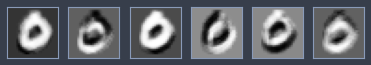

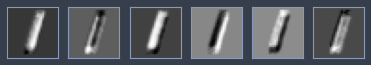

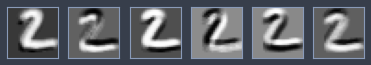

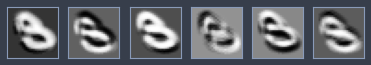

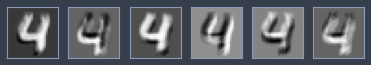

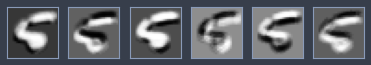

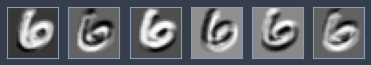

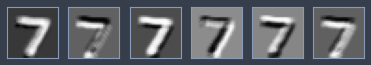

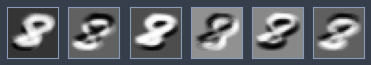

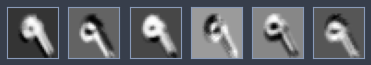

In [8]:
# redefine model to output right after the first hidden layer
vis_model = keras.Model(inputs=model.inputs, outputs=model.layers[0].output)
vis_model.summary()
# visualize all maps
for img in examples:
    plot_feature_map(vis_model, img)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 16)        2416      
Total params: 2,572
Trainable params: 2,572
Non-trainable params: 0
_________________________________________________________________


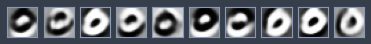

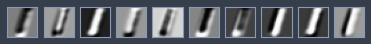

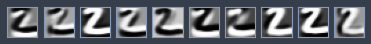

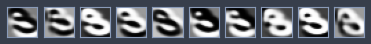

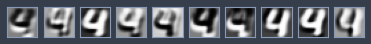

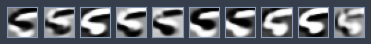

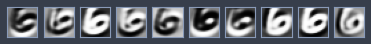

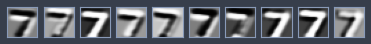

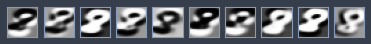

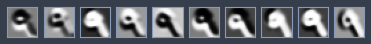

In [9]:
# repeat for next conv
vis_model = keras.Model(inputs=model.inputs, outputs=model.layers[2].output)
vis_model.summary()
for img in examples:
    plot_feature_map(vis_model, img, num_to_vis=10)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 120)         48120     
Total params: 50,692
Trainable params: 50,692
Non-trainable params: 0
_______________________________________________________

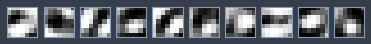

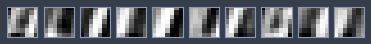

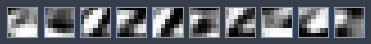

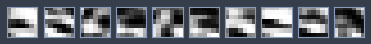

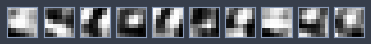

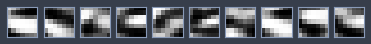

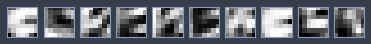

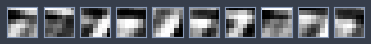

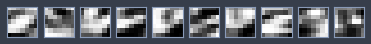

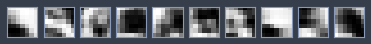

In [10]:
# repeat for next conv
vis_model = keras.Model(inputs=model.inputs, outputs=model.layers[4].output)
vis_model.summary()
for img in examples:
    # Only show the first 10
    plot_feature_map(vis_model, img, num_to_vis=10)

It is cool to see that as the layers get deeper, the resolution of the feature maps gets smaller, and the images get less and less recognizable, but contain the correct places to activate the hidden layer. This information is even cooler when using a model like VGG

## VGG

In [11]:
# We can simpy use a pretrained VGG model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import load_img, img_to_array
from numpy import expand_dims
# Load the model
vgg_model = VGG16()
# Get first conv layer
vis_model = Model(inputs=vgg_model.inputs, outputs=vgg_model.layers[1].output)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 5880)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 84)               

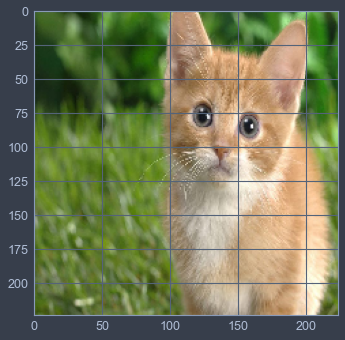

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


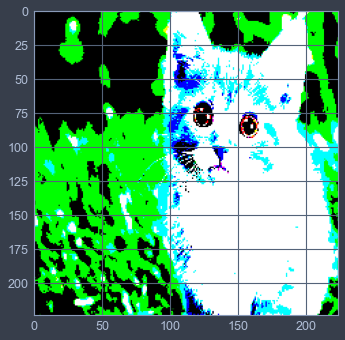

In [12]:
# Aww
img = load_img('./img/kitten.jpg', target_size=(224, 224))
plt.imshow(img)
plt.show()
# Preprocess image so that it is in the format VGG expects
# Preprocessing involves normalizing, and reshaping
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)
plt.imshow(img[0,:,:,:])

The preprocessed image is less cute, but is necessary

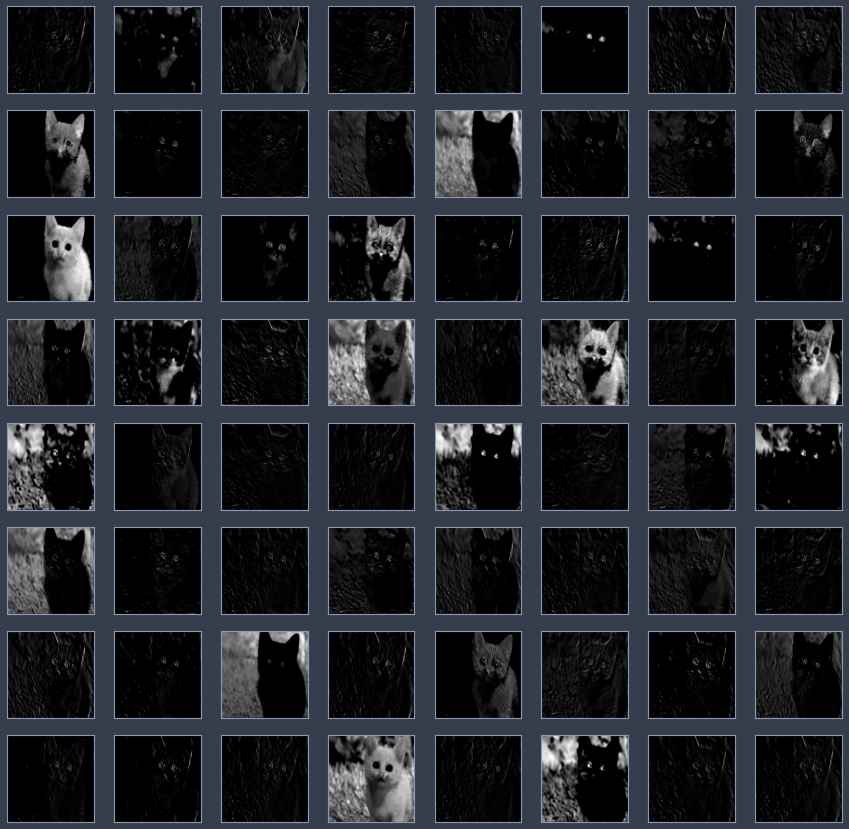

In [13]:
plot_feature_map_grid(vis_model, img)

This has some pretty cool results. I especially like the ones where the eyes are lit up, since this is showing that there are some features that are picking up the round shape of the eyes, and placing importance on them. This could be some insight into how VGG uses a hierarchy of features.